# Red Wine Quality
Simple and clean practice dataset for regression or classification modelling


## Download the data directly

In [1]:
!pip install kaggle -q
!pip install skfeature-chappers -q
!pip install imblearn -q
!pip install sklearn -q
!pip install scikit-learn -q

In [3]:
##---------Type the code below this line------------------##
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.metrics import r2_score
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [6]:
os.environ['KAGGLE_USERNAME'] = "sibasispradhan"
os.environ['KAGGLE_KEY'] = "b6ddbd4dcb537501873527c027be7935"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [7]:
api.dataset_list_files('uciml/red-wine-quality-cortez-et-al-2009').files
api.dataset_download_files('uciml/red-wine-quality-cortez-et-al-2009', path=".")

## Code for converting the above downloaded data into a dataframe

In [8]:
##---------Type the code below this line------------------##
df=pd.read_csv("red-wine-quality-cortez-et-al-2009.zip")

## Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [9]:
##---------Type the code below this line------------------##
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Display the column headings, statistical information, description and statistical summary of the data.

In [11]:
##--------- Column Headings ------------------##
print('Column Headings:')
df.columns

Column Headings:


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
##--------- Statistical information, Description and Statistical summary of the data ------------------##
print('Statistical information, Description and Statistical summary of the data:')
print('Size of Dataset:  #Rows -',df.shape[0],'  #Columns -',df.shape[1])
df.describe()

Statistical information, Description and Statistical summary of the data:
Size of Dataset:  #Rows - 1599   #Columns - 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
##--------- Data Types ------------------##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Preparation

## Check for 

* duplicate data
* missing data
* data inconsistencies


### For duplicate data :

In [14]:
##---------Duplicate Data------------------##
print('Duplicate Rows are as follows:')
display(df[df.duplicated()])

Duplicate Rows are as follows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


### For Missing Data

In [15]:
##---------Missing Data------------------##
print('Number of rows with Missing Data :')
display(df.isna().sum())
print('No Missing Data is observed in the dataset')

Number of rows with Missing Data :


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Missing Data is observed in the dataset


### For data inconsistencies:

In [16]:
##--------- Data Types ------------------##
display(df.info())
print('No Inconsistent data is observed in the selected dataset. All data type observed - Float64 / Int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

No Inconsistent data is observed in the selected dataset. All data type observed - Float64 / Int64


## Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [17]:
##--------- To remove duplicate data ------------------##
df_shape0 = df.shape
print('Dataset size before removal of duplicate rows =',df_shape0[0])
df2 = df.drop_duplicates(keep='first')
df_shape1 = df2.shape
print('Dataset size after removal of duplicate rows =',df_shape1[0])

print('Number of Duplicate rows = ',df_shape0[0] - df_shape1[0])

Dataset size before removal of duplicate rows = 1599
Dataset size after removal of duplicate rows = 1359
Number of Duplicate rows =  240


In [18]:
##--------- To impute or remove missing data ------------------##

# In Case Null values are observed - Dropna() function can be used 

df2_shape0 = df2.shape
df2 = df2.dropna()
df2_shape1 = df2.shape

print('Dataset size before removal of Missing value rows =',df2_shape0[0])
print('Dataset size after removal of Missing value rows =',df2_shape1[0])

print('Number of Missing value rows = ',df2_shape0[0] - df2_shape1[0])

# Imputation can also be applied, subject to data type and missing values

Dataset size before removal of Missing value rows = 1359
Dataset size after removal of Missing value rows = 1359
Number of Missing value rows =  0


In [19]:
##--------- To remove data inconsistencies ------------------##

print('pH Value lies within the range 1(Acidic) to 14(Basic). For wines, pH Value lies within the range 2.5 to 4.5')
print('Inconsistent Data by pH Value:')
inconsistent_rows = df2.loc[(df2['pH'] > 4.5) | (df2['pH'] < 2.5)]
print(inconsistent_rows)
df2 = df2.drop(inconsistent_rows.index)

print('\n','Inconsistent Data by Alcohol %: (Max Alcohol % in Wines is 30%)')
inconsistent_rows = df2.loc[df2['alcohol'] > 30]
print(inconsistent_rows)
df2 = df2.drop(inconsistent_rows.index)

pH Value lies within the range 1(Acidic) to 14(Basic). For wines, pH Value lies within the range 2.5 to 4.5
Inconsistent Data by pH Value:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

 Inconsistent Data by Alcohol %: (Max Alcohol % in Wines is 30%)
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


## Encode categorical data

## Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

## Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

For removal of duplicate data:      
Duplicate data in a dataset can have several negative impacts on data analysis and modeling.     
• To remove duplicate data, Pandas drop_duplicates() function is used
• Datasets that contain duplicates may contaminate the training data with the test data or vice versa. This may lead to good accuracy during ML Model development, however during actual deplyoment of ML model the accuracy would drop drastically    
• Duplicate data can waste storage resources, as well as the time and effort required to collect and manage the data.    
• By removing duplicates, the accuracy and integrity of the data can be improved, and the results of any data analysis or       modeling will be more reliable.

To impute or remove missing data:      
Missing data can cause various problems in data analysis and machine learning tasks.  
• To remove missing data, Pandas dropna() function is used. For imputation SimpleImputer function can be used from sklearn python library to create an imputer object with mean strategy
• Missing data can affect the completeness of the dataset, and if a significant amount of data is missing, it may not be possible to perform analysis or modeling accurately.
• Missing data can also affect the performance of machine learning models, leading to poor predictions.
• Imputing or removing missing data can improve model performance by reducing noise and improving the quality of the training data.
• Imputation is of great importance especially when dataset size is small.

To remove data inconsistencies:      
Inconsistent data can be inaccurate, misleading, or erroneous, and can lead to incorrect conclusions or predictions. 
• To remove inconsistent data, subject knowledge is essential, like 
    (1) the range of pH value for Wine lies within 2.5 to 4.5 and 
    (2) the range of alcohol % in wines lies less than 30%
It is important to carefully assess the impact of removing data inconsistencies on the overall quality and validity of the data, and to use appropriate methods and techniques to ensure that the data remains representative of the population.

## Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

In [20]:
##---------Type the code below this line------------------##

X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

print('X shape (Features): ',X.shape)
print(df2.columns[:-1])
print('\ny shape (Label / Target Variable): ',y.shape,'--> y ranges from',min(y),'to', max(y), '(Higher being better quality)')

X shape (Features):  (1359, 11)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

y shape (Label / Target Variable):  (1359,) --> y ranges from 3 to 8 (Higher being better quality)


In [21]:
#------------ To check if data is balanced ------------#
print('Count of rows with Quality value (in descending order of count)')
print('Quality : No. of rows')
display(Counter(y))

# Since the data is highly imbalance, RandomOversampler is used in later stage. Other methods which can be used are 
# Synthetic Minority Oversampling Technique (SMOTE)


Count of rows with Quality value (in descending order of count)
Quality : No. of rows


Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})

## Data Exploration using various plots

## Scatter plot of each quantitative attribute with the target.

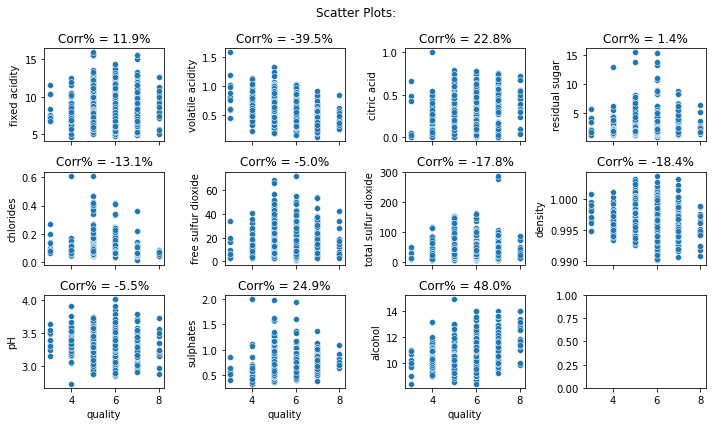

In [22]:
##---------Type the code below this line------------------##
fig, axes = plt.subplots(3, 4, sharey=False, sharex=True, figsize=(10,6))
fig.suptitle('Scatter Plots:')
i = 0
for col_ in df2.columns[:-1]:
    ax = axes[i // 4, i%4]
    corr_ = df2['quality'].corr(df2[col_])
    sns.scatterplot(ax=ax, y=df2[col_], x=df2['quality'],)
    ax.set_title("Corr% = " + str(round(corr_*100,1)) + '%')
    i += 1
plt.tight_layout()

## EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

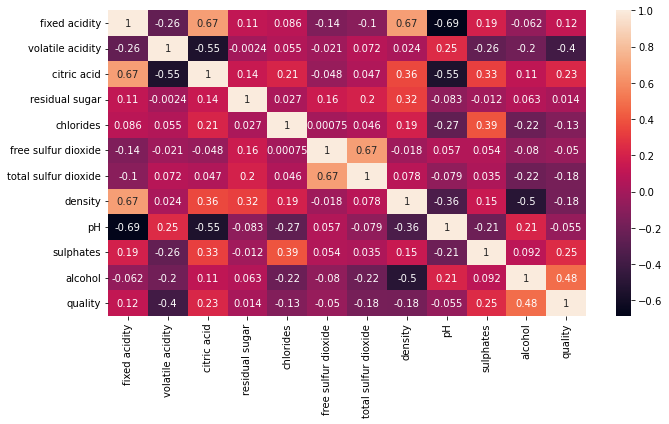

In [23]:
##---------Type the code below this line------------------##
plt.figure(figsize=(10,6))
sns.heatmap(data=df2.corr(),annot=True)
plt.tight_layout()

In [24]:
##--------------To identify the optimal set of attributes that can be used for classification----------------##
df_corr = df2.corr().sort_values(by=['quality'], ascending=False)
df_corr[1:]['quality']

alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

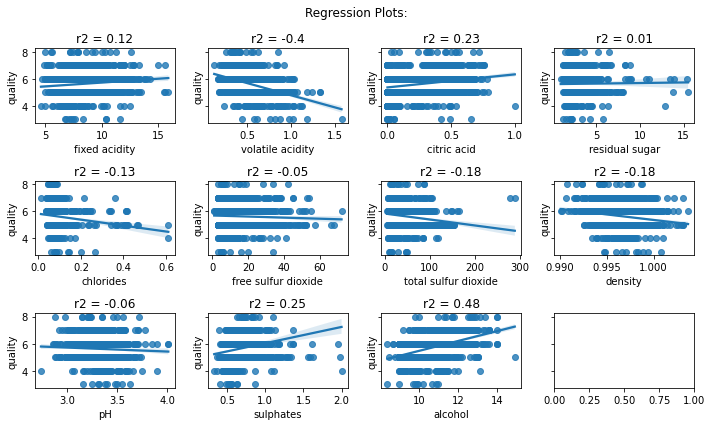

In [25]:
fig, axes = plt.subplots(3, 4, sharey=True, sharex=False, figsize=(10,6))
r2 = []
fig.suptitle('Regression Plots:')
i = 0
for col_ in df2.columns[:-1]:
    ax = axes[i // 4, i%4]
    corr_ = df2['quality'].corr(df[col_])
    sns.regplot(ax=ax, x = df2[col_], y = "quality", data = df2, scatter=True)
    ax.set_title("r2 = " + str(round(corr_,2)))
    i += 1
    r2.append(r2_score(df2['quality'], df2[col_]))
plt.tight_layout()

In [37]:
##----------------Pair Plot--------------------------##  VERY SLOW in processing
# g = sns.pairplot(data=df2,hue="alcohol")
# g.fig.suptitle("Pair Plots")

Following are the optimal set of attributes that can be used for Red Wine's 'qualtiy' classification based on correlation heat map:

1a. Highly positively correlated attributes: 'alcohol'
1b. Highly negatively correlated attributes: 'volatile acidity'
    These may show most significance in classification

2a. Moderately positively correlated attributes: 'sulphates' & 'citric acid'
2b. Moderately negatively correlated attributes: 'density' & 'total sulfur dioxide'

3a. Slightly positively correlated attributes: 'fixed acidity'
3b. Slightly negatively correlated attributes: 'chlorides'

4. Very low correlated attributes : 'residual sugar' , 'free sulfur dioxide' and 'pH'
   These may show least significance in classification

Thus optimal set of attributes are: 
'alcohol' , 'volatile acidity' , 'sulphates' , 'citric acid' , 'density' , 'total sulfur dioxide' , 'fixed acidity' , 'chlorides'

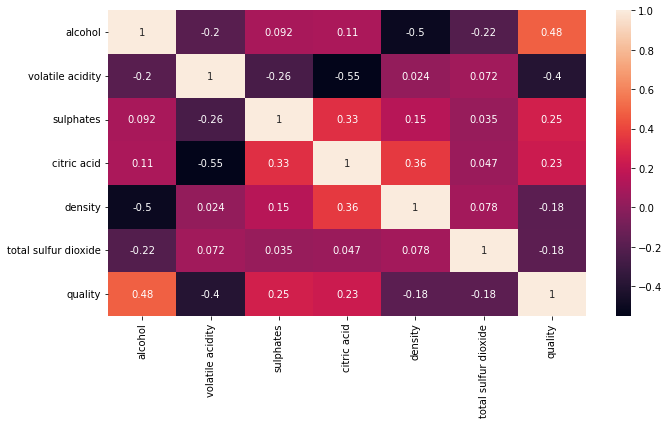

In [26]:
##---------------Correlation Heat map with Selected optimal Attributes---------------##
plt.figure(figsize=(10,6))
opt_cols = ['alcohol','volatile acidity','sulphates' , 'citric acid', 'density' , 'total sulfur dioxide', 'quality']
sns.heatmap(data=df2[opt_cols].corr(),annot=True)
plt.tight_layout()

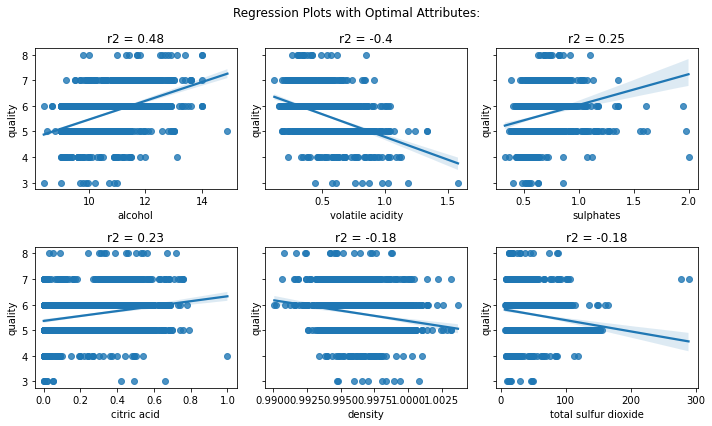

In [27]:
##---------------Regression Plot with Selected optimal Attributes---------------##
fig, axes = plt.subplots(2, 3, sharey=True, sharex=False, figsize=(10,6))
fig.suptitle('Regression Plots with Optimal Attributes:')
i = 0
for col_ in opt_cols[:-1]:
    ax = axes[i // 3, i%3]
    corr_ = df2['quality'].corr(df[col_])
    sns.regplot(ax=ax, x = df2[col_], y = "quality", data = df2, scatter=True)
    ax.set_title("r2 = " + str(round(corr_,2)))
    i += 1
plt.tight_layout()

## Data Wrangling



## Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)

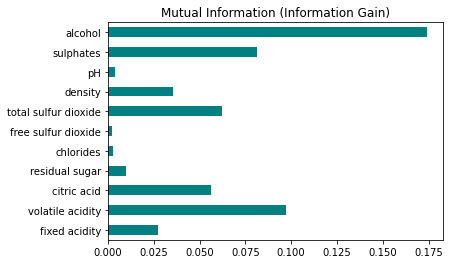

In [28]:
##---------Type the code below this line------------------##

##---------Using Mutual Information (Information Gain)----------##
'''
Information gain calculates the reduction in entropy from the transformation of a dataset. 
It can be used for feature selection by evaluating the Information gain of each variable in 
the context of the target variable.
'''

from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

plt.title('Mutual Information (Information Gain)')
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df2.columns [0:len(df2.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()


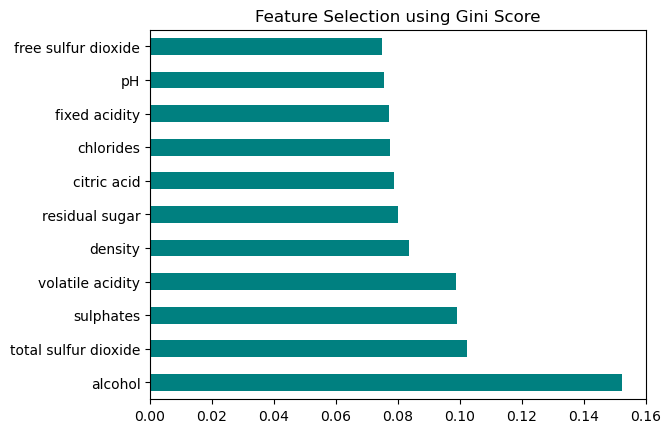

In [41]:
##---------Using Gini score----------##
'''
Gini index is a measure of impurity or diversity used in 
decision tree-based algorithms for feature selection. 
Based on this Feature importance is extracted
'''

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(criterion='gini')

X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

model.fit(X,y)
plt.title('Feature Selection using Gini Score')
feat_importances = pd.Series(model.feature_importances_, index=df2.columns [0:len(df2.columns)-1])
feat_importances.nlargest(len(df2.columns)-1).plot(kind='barh', color = 'teal')
plt.show()

## Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Top 5 significant features by evaluating each feature independently with respect to the target variable 'quality' as per order of importance:

(A) Using Mutual Information (Information Gain):
    1. 'alcohol'
    2. 'volatile acidity'
    3. 'sulphates'
    4. 'density'
    5. 'total sulphur dioxide'
    
(B) Using Gini Index:
    1. 'alcohol'
    2. 'sulphates'
    3. 'total sulphur dioxide'
    4. 'volatile acidity'
    5. 'density'
    
As observed, both Mutual Information and Gini Index gave same top 5 features but in different orders of importance.

Justification:

(A) Information gain calculates the reduction in entropy from the transformation of a dataset.  It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

(B) Gini index is a measure of impurity or diversity used in decision tree-based algorithms for feature selection. Based on this Feature importance is extracted

## Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

## ML technique 1 + Justification

1st ML Algorithm used for classification activity of Red Wine Quality is 'Decision Tree Classifier'
This is used due to the following reasons:
• Decision trees are particularly effective when the input variables have a mixture of categorical and numerical data types. For our dataset, all input features are of numeric data type (continuous) and Label/Output column 'quality' has classes from 3 to 8 i.e. 6 classes (Discrete Numeric)
• Decision trees are best suited for problems where the relationship between the input variables and the target variable is nonlinear and complex.
• Decision trees are easy to understand and interpret as they provide a way to visualize algorithms.

MinMaxScaler() Accuracy =  83.26 %
StandardScaler() Accuracy =  81.96 %
RobustScaler() Accuracy =  83.98 %


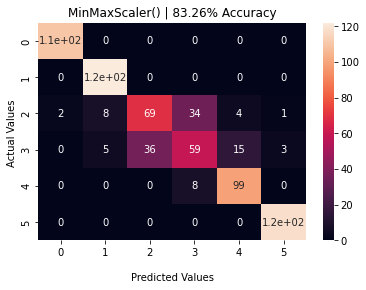

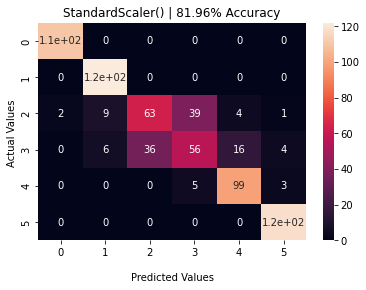

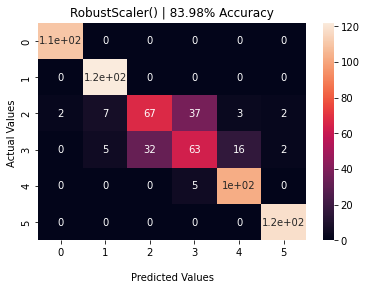

In [29]:
##---------Type the code below this line------------------##

# Using Optimal Features
df3 = df2[['alcohol','sulphates','total sulfur dioxide', 'volatile acidity', 'density','quality']].copy()

X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

# To correct imbalanced data
ros=RandomOverSampler()
X_std,y_std=ros.fit_resample(X,y)
# Counter(y_std)

X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,random_state=1,test_size=0.20)

sc_s = [MinMaxScaler(), StandardScaler(), RobustScaler()]
for sc in sc_s:
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    dt = DecisionTreeClassifier() # Default criterion = 'gini'
    dt.fit(X_train_sc,y_train)
    y_pred = dt.predict(X_test_sc)
    ac_dt=accuracy_score(y_pred,y_test)*100
    print(str(sc),'Accuracy = ',round(ac_dt,2),'%')
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(str(sc) + ' | ' + str(round(ac_dt,2)) + '% Accuracy')
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

Using Seaborn Library: 
Confusion Matrix is plotted with automatic label encoding - 0 to 5 which corresponds to 3 to 8 'quality' labels

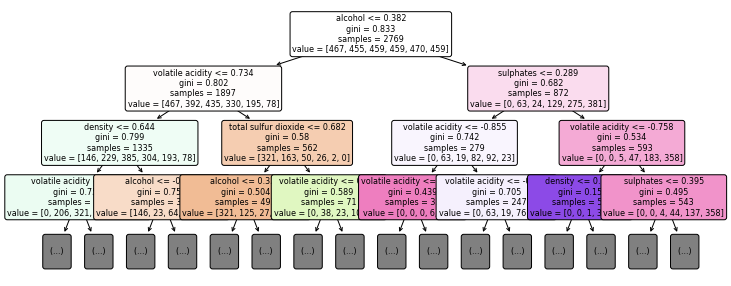

In [30]:
#Visualizing the decision tree with last saved decision tree
from sklearn import tree

# class_ = ['3','4','5','6','7','8']

fig = plt.figure(figsize=(12,5)) 
s = tree.plot_tree(dt, feature_names=df3.columns[:-1].values,filled=True, rounded=True, fontsize=8, max_depth=3)


Observations:
Using Decision Tree Classifier approximate 84% accuracy is observed for all three scaling function used.

## ML technique 2 + Justification

2nd ML Algorithm used for classification activity of Red Wine Quality is 'Random Forest Classifier'
Random Forest is a specific type of ensemble learning that involves creating multiple decision trees and then averaging their predictions.

This is used due to the following reasons:
• Random forest classification can be used for numerical data analysis, as well as for categorical data analysis.  tree.
• Random forest is effective in reducing overfitting because it uses an ensemble of decision trees rather than a single. Thus improves the generalization performance of the model
• It can identify complex nonlinear relationships and interactions between features that may not be apparent with simpler linear models.


------------------------------------------- RandomForestClassifier -------------------------------------------
MinMaxScaler() Accuracy Score =  87.88 %
StandardScaler() Accuracy Score =  88.31 %
RobustScaler() Accuracy Score =  87.88 %


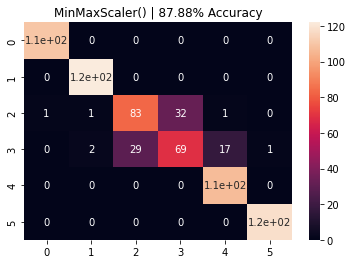

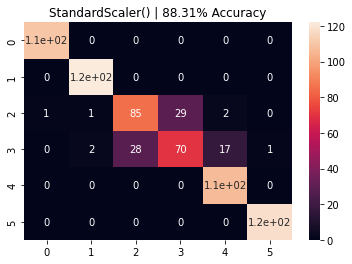

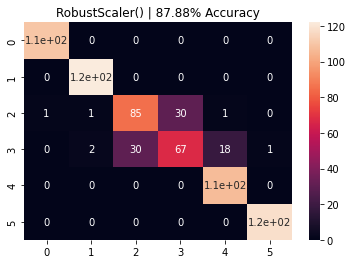

In [31]:
##---------Type the code below this line------------------##
from sklearn.ensemble import RandomForestClassifier

ml_rf = RandomForestClassifier(random_state=1)
print('\n------------------------------------------- RandomForestClassifier -------------------------------------------')
for sc in sc_s:
    
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    ml_rf.fit(X_train_sc, y_train)
    y_pred = ml_rf.predict(X_test_sc)
#     print('\n------------------------------------------- Classification report -------------------------------------------')
#     print(classification_report(y_test, y_pred))
    ac_rf = accuracy_score(y_pred,y_test)*100
    print(sc,'Accuracy Score = ',round(ac_rf,2),'%')
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
#     print('\n------------------------------------------- Confusion Matrix -------------------------------------------')
    plt.title(str(sc) + ' | '  +  str(round(ac_rf,2))+ '% Accuracy')
    sns.heatmap(cf_matrix, annot=True);

Using Seaborn Library: 
Confusion Matrix is plotted with automatic label encoding - 0 to 5 which corresponds to 3 to 8 'quality' labels

Observations:
Using Random Forest Classifier approximate 88% accuracy is observed for all three scaling function used.
This is due to the fact that RandomForest is an ensemble approach which improves the generalization performance and reduces overfit tendency.

## Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.


------------------------------------------- Decision Tree Classification report -------------------------------------------
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       110
           4       0.89      1.00      0.94       122
           5       0.67      0.56      0.61       118
           6       0.60      0.53      0.56       118
           7       0.84      0.93      0.88       107
           8       0.94      1.00      0.97       118

    accuracy                           0.83       693
   macro avg       0.82      0.83      0.83       693
weighted avg       0.82      0.83      0.82       693


------------------------------------------- Random Forest Classification report -------------------------------------------
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       110
           4       0.98      1.00      0.99       122
           5       0.75      0.72      0.74 

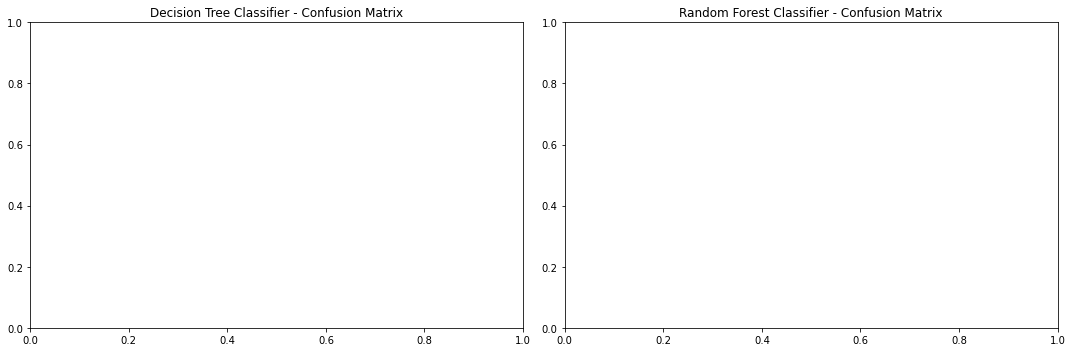

In [33]:
##---------Type the code below this line------------------##

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
y_pred = dt.predict(X_test_sc)

print('\n------------------------------------------- Decision Tree Classification report -------------------------------------------')
print(classification_report(y_test, y_pred))
ax = axes[0]
ax.set_title('Decision Tree Classifier - Confusion Matrix')
plot_confusion_matrix(dt,X_test_sc, y_test,cmap='Blues', display_labels=['3','4','5','6','7','8'], ax=ax)


ml_rf.fit(X_train_sc, y_train)
y_pred = ml_rf.predict(X_test_sc)

print('\n------------------------------------------- Random Forest Classification report -------------------------------------------')
print(classification_report(y_test, y_pred))
ax = axes[1]
ax.set_title('Random Forest Classifier - Confusion Matrix')
plot_confusion_matrix(ml_rf,X_test_sc, y_test,cmap='Blues', display_labels=['3','4','5','6','7','8'], ax=ax)

plt.tight_layout()
plt.show()

Conclusion:
Random Forest shows better classification results in terms of:
• Accuracy (Random Forest = 88% > Decision Tree = 84%)
• Recall of Random Forest is higher than that of Decision Tree for all the classes
• F1 Score of Random Forest is higher than that of Decision Tree for all the classes

Overall, Random Forest shows better performance than Decision Tree

## Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

##---------Type the answer below this line------------------##

The business problem for the red wine dataset is to predict the quality of the wine based on its physicochemical properties. The solution proposed involves building a machine learning classification model that uses the input features (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) to predict the quality of the wine on a scale of 0 to 10.

So by identifying the quality using machine learning, the quality prediction task can be quick, efficient and cost-effective without the bias of person's personal taste and preferences. This may help wine manufacturers to control the quality prior to the wine production.

Learnings while working through solving the problem in terms of challenges, observations, decisions made etc.:

1. Identifying the source of data

2. Methodology of downloading the data directly from Kaggle database using KaggleApi in python environment

3. Data exploration: Before building the machine learning model, it is important to explore the data to understand its properties, distributions, and relationships by visualizing the data, calculating summary statistics, and identifying any missing or inconsistent values.

4. Feature engineering identifying relevant features, normalizing the data, and creating new features using domain knowledge.

5. ML Model selection depending on the type of data, the number of features, and the desired level of accuracy. Machine Learning based Classification algorithms development are used (a) Decision Tree and (b) Random Forest

6. Evaluation metrics: The performance of the machine learning model needs to be evaluated using appropriate metrics, such as accuracy, precision, recall, and F1 score.

7. Dealing with imbalanced classes. To address this, techniques such as oversampling and undersampling are learnt and implemented

In summary, solving the business problem with the red wine dataset on Kaggle requires a combination of data exploration, feature engineering, model selection, and evaluation metrics.


Thank You